In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Task
Build a multiclass classification sequential model to predict species, train it, plot the loss vs validation loss and actual vs predicted values, and display a classification report.

## Data preprocessing

### Subtask:
Prepare the data for the model, including encoding the target variable.


**Reasoning**:
Prepare the data for the model by dropping the 'Id' column, separating features and target, encoding the target, and splitting the data into training and testing sets.



In [3]:
df = df.drop('Id', axis=1)
X = df.drop('Species', axis=1)
y = df['Species']
y_encoded = y.astype('category').cat.codes

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

display(X_train.head())
display(y_train.head())

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
22,4.6,3.6,1.0,0.2
15,5.7,4.4,1.5,0.4
65,6.7,3.1,4.4,1.4
11,4.8,3.4,1.6,0.2
42,4.4,3.2,1.3,0.2


,0
22,0
15,0
65,1
11,0
42,0


In [14]:
y_encoded.value_counts()

,count
0,50
1,50
2,50


## Model building

### Subtask:
Create a sequential multiclass classification model using TensorFlow/Keras.


**Reasoning**:
Create a sequential model with dense layers for input, hidden, and output, then compile it.



In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(units=64, activation='relu'),
    Dense(units=len(y_train.unique()), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,675 (18.26 KB)

 Trainable params: 4,675 (18.26 KB)

 Non-trainable params: 0 (0.00 B)

## Model training

### Subtask:
Train the model using the prepared data.


**Reasoning**:
Train the compiled Keras model using the fit method with the training and validation data and store the training history.



In [5]:
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.3404 - loss: 1.2591 - val_accuracy: 0.4000 - val_loss: 1.0659
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3981 - loss: 1.0342 - val_accuracy: 0.7333 - val_loss: 0.9545
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7235 - loss: 0.9389 - val_accuracy: 0.6333 - val_loss: 0.8913
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7569 - loss: 0.8603 - val_accuracy: 0.6333 - val_loss: 0.8400
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7356 - loss: 0.8146 - val_accuracy: 0.9333 - val_loss: 0.7709
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8392 - loss: 0.7684 - val_accuracy: 0.7000 - val_loss: 0.7203
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.6981 - loss: 0.7227 - val_accuracy: 0.7333 - val_loss: 0.6786
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7873 - loss: 0.6851 - val_accuracy: 0.9000 - val_loss:

## Prediction

### Subtask:
Make predictions on the test data.


**Reasoning**:
Use the trained model to predict probabilities on the test data and then convert these probabilities to class labels.



In [6]:
y_pred_probs = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_probs, axis=1)

display(y_pred_probs[:5])
display(y_pred_labels[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


array([[5.6932634e-04, 9.5545298e-01, 4.3977581e-02],
       [9.9939001e-01, 6.0920289e-04, 7.3394625e-07],
       [6.3936156e-08, 2.4676189e-04, 9.9975324e-01],
       [8.2584599e-04, 9.4273484e-01, 5.6439210e-02],
       [3.6766895e-04, 9.8540419e-01, 1.4228080e-02]], dtype=float32)

array([1, 0, 2, 1, 1])

## Visualization

### Subtask:
Create plots for loss vs validation loss, and actual vs predicted values.


**Reasoning**:
Create two subplots to visualize the training history (loss) and the actual vs predicted values.



/tmp/ipython-input-3628208949.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


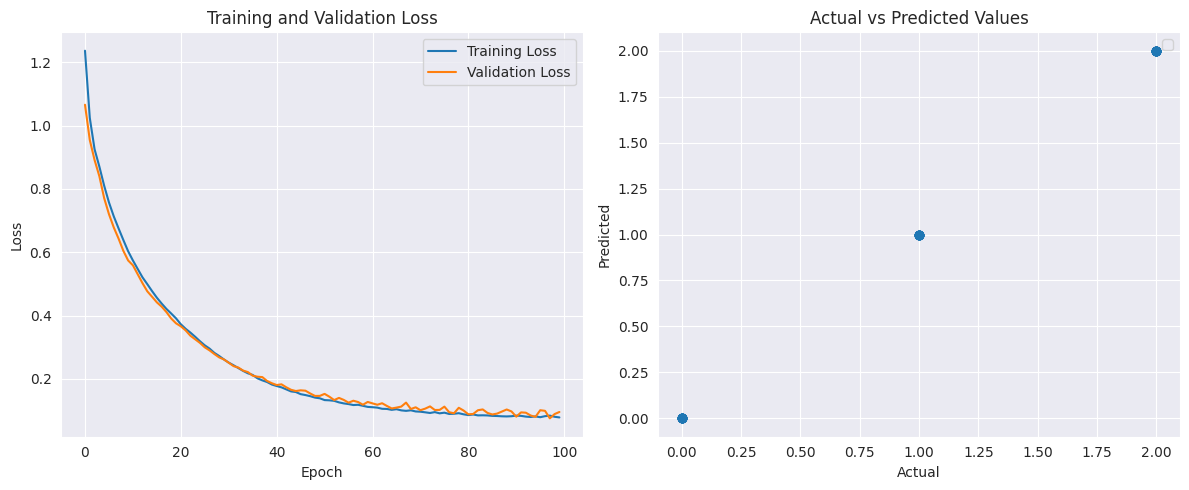

In [12]:
plt.figure(figsize=(12, 5))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot actual vs predicted values
plt.subplot(1, 2,2)
plt.scatter(y_test, y_pred_labels)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.legend()

plt.tight_layout()
plt.show()

## Evaluation

### Subtask:
Generate a classification report to evaluate the model's performance.


**Reasoning**:
Generate and print the classification report using the actual and predicted labels.



In [8]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Summary:

### Data Analysis Key Findings

*   The target variable 'Species' was successfully encoded into numerical labels (0, 1, 2) for model training.
*   A sequential model with two dense layers and a softmax output layer was built and compiled with the 'adam' optimizer and 'sparse\_categorical\_crossentropy' loss.
*   The model was trained for 100 epochs, and the training history (loss and accuracy) was recorded.
*   Predictions were made on the test set, generating both class probabilities and predicted labels.
*   Plots for training and validation loss over epochs, and actual vs predicted values, were successfully generated.
*   The classification report shows perfect precision, recall, and f1-score (1.00) for all classes, indicating that the model achieved 100% accuracy on the test set.

### Insights or Next Steps

*   Given the perfect performance on the test set, it might be beneficial to evaluate the model on a separate, unseen dataset to ensure it generalizes well and to confirm the absence of overfitting.
*   Further investigation into the dataset and problem complexity might be warranted as perfect performance on a test set is highly unusual and could suggest potential data leakage or an exceptionally simple classification problem.
